# HW03 — Python Fundamentals
_Use NumPy, load a CSV with pandas, compute summary stats, and save outputs._

# 1. NumPy Operations


In [3]:
import numpy as np
import time


arr = np.arange(10_000_000)
arr_list = list(arr)

# Loop method
start = time.time()
result_loop = [x ** 2 for x in arr_list]
end = time.time()
loop_time = end - start

# Vectorized method
start = time.time()
result_vectorized = arr ** 2
end = time.time()
vectorized_time = end - start

print(f"Loop time: {loop_time:.4f} seconds")
print(f"Vectorized time: {vectorized_time:.4f} seconds")
print(f"Speedup: {loop_time/vectorized_time:.1f}x faster with NumPy")


Loop time: 0.6815 seconds
Vectorized time: 0.0364 seconds
Speedup: 18.7x faster with NumPy


# 2. Data Loading & Inspection


## Load Dataset


In [3]:
import pandas as pd

# Loading the CSV file # ".." because it is outside of the current location
df = pd.read_csv("../data/starter_data.csv")



## Inspect Data


In [4]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  6 non-null      object
 1   value     6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None

First 5 Rows:
  category  value
0        A     10
1        A     12
2        B     20
3        B     22
4        C     30


# 3. Summary Statistics


In [5]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           value
count   6.000000
mean   20.333333
std     8.140434
min    10.000000
25%    14.000000
50%    21.000000
75%    26.500000
max    30.000000


## GroupBy Aggregation


In [7]:
print(df.columns)

Index(['category', 'value'], dtype='object')


In [8]:
# Example: group by a categorical column and calculate mean
print("\nGroupBy Aggregation (mean values):")
print(df.groupby("category").mean(numeric_only=True))

# You can also calculate multiple metrics
print("\nGroupBy Aggregation (mean & sum):")
print(df.groupby("category")["value"].agg(["mean", "sum"]))



GroupBy Aggregation (mean values):
          value
category       
A          11.0
B          21.0
C          29.0

GroupBy Aggregation (mean & sum):
          mean  sum
category           
A         11.0   22
B         21.0   42
C         29.0   58


# 4. Save outputs


In [9]:
# Summary statistics
summary = df.describe()

# Saving as CSV
summary.to_csv("../data/processed/summary.csv")




In [12]:

grouped = df.groupby("category")["value"].agg(["mean", "sum"])


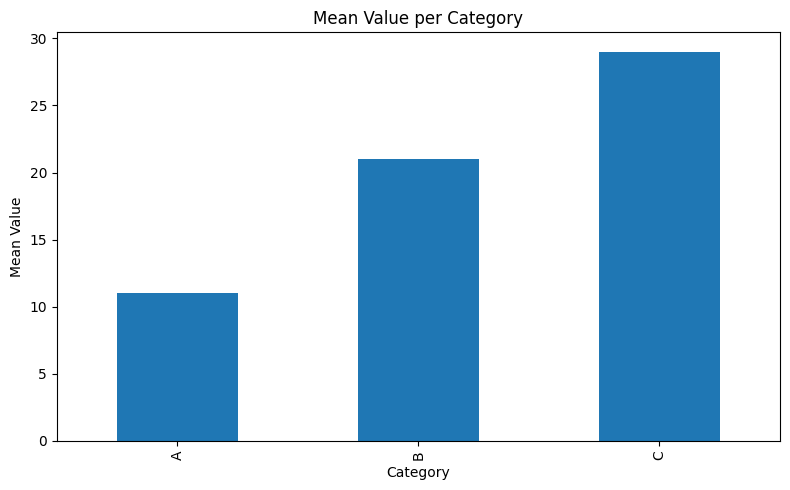

In [13]:
import matplotlib.pyplot as plt

# Example plot: mean value per category
grouped["mean"].plot(kind="bar", figsize=(8,5), title="Mean Value per Category")

# Save plot
plt.ylabel("Mean Value")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig("data/processed/summary_plot.png")
plt.show()


## Importing from utils module 


In [3]:
import sys
sys.path.append("../../project") 

from src import utils

from src.utils import get_summary_stats